# 연령별 취업자수 관계

- 국가통계포털에서 <mark>행정구역(시도)/성/연령별 취업자</mark> 데이터 다운로드
- 전처리하기
<hr>
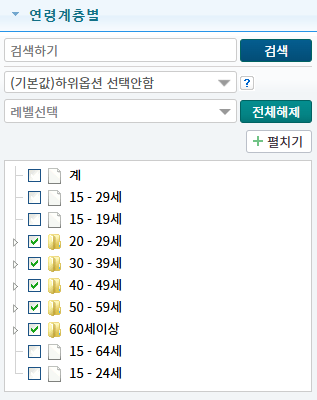

In [1]:
import pandas as pd
import matplotlib
import matplotlib as rc
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [ ]:
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm
fontlist=fm.findSystemFonts(fontpaths=None, fontext='ttf')
fontlist

Text(0.3, 0.3, '한글')

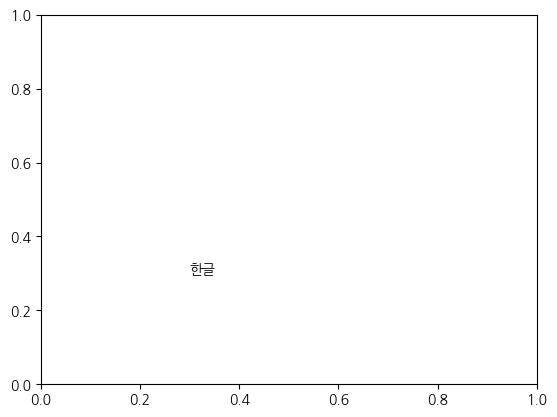

In [5]:
# 윈도우용 폰트 경로 설정
path="C:\\Windows\\Fonts\\NanumGothic.ttf"
font_name = fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)
plt.text(0.3,0.3,'한글')

In [7]:
import pandas as pd
file_path = "./ref/행정구역시도성연령별취업자_20250304.csv"
ori = pd.read_csv(file_path,encoding="EUC-KR")
ori.head()

,시도별,시점,연령계층별,성별,데이터
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773


In [20]:
ex_data = ori.copy()
ex_data.columns = ['resion', 'year', 'age', 'gender', 'value']
# ex_data['value'] = pd.to_numeric(ex_data['value'], errors='coerce')  # 숫자로 변환, 오류 발생 시 NaN으로 처리
# ex_data['value'] = ex_data['value'].fillna(0)  # NaN 값을 0으로 채움
# ex_data['value'] = ex_data['value'].astype(int)  # 'value' 열을 정수형으로 변환
# result = ex_data.groupby('year')['value'].sum()  # 연도별로 'value' 값 합계 계산
# print(result)
ex_data.loc[ex_data['resion']=='세종특별자치시','value']=ex_data.loc[ex_data['resion']=='세종특별자치시']['value'].replace('-',0)
ex_data

,resion,year,age,gender,value
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773
...,...,...,...,...,...
7435,제주도,2024.4/4,40 - 49세,여자,44
7436,제주도,2024.4/4,50 - 59세,남자,54
7437,제주도,2024.4/4,50 - 59세,여자,47
7438,제주도,2024.4/4,60세이상,남자,49


In [26]:
ex_data['value'] = ex_data['value'].astype(int)  
ex1_data=ex_data.groupby('year')['value'].sum().reset_index(name='total')

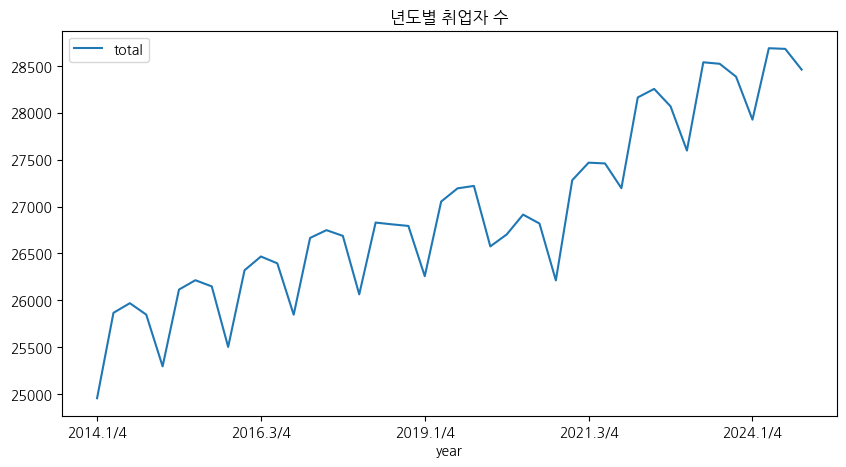

In [28]:
ex1_data.plot(x='year', y='total', figsize=(10,5), title="년도별 취업자 수")
plt.show()

In [32]:
ex2_data = ori.copy()
ex2_data.columns = ['resion', 'year', 'age', 'gender', 'value']
ex2_data.loc[ex_data['resion']=='세종특별자치시','value']=ex_data.loc[ex_data['resion']=='세종특별자치시']['value'].replace('-',0)
ex2_data

,resion,year,age,gender,value
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773
...,...,...,...,...,...
7435,제주도,2024.4/4,40 - 49세,여자,44
7436,제주도,2024.4/4,50 - 59세,남자,54
7437,제주도,2024.4/4,50 - 59세,여자,47
7438,제주도,2024.4/4,60세이상,남자,49


In [33]:
ex2_data['value']=ex2_data['value'].astype(int)  
gen = ex2_data.groupby(['year','gender'])['value'].sum().reset_index(name='total')
gen

,year,gender,total
0,2014.1/4,남자,14650
1,2014.1/4,여자,10305
2,2014.2/4,남자,15027
3,2014.2/4,여자,10839
4,2014.3/4,남자,15088
...,...,...,...
83,2024.2/4,여자,12716
84,2024.3/4,남자,15945
85,2024.3/4,여자,12737
86,2024.4/4,남자,15868


In [39]:
filter_m=gen['gender']=='남자'
filter_f=gen['gender']=='여자'
male=gen[filter_m]
female=gen[filter_f]

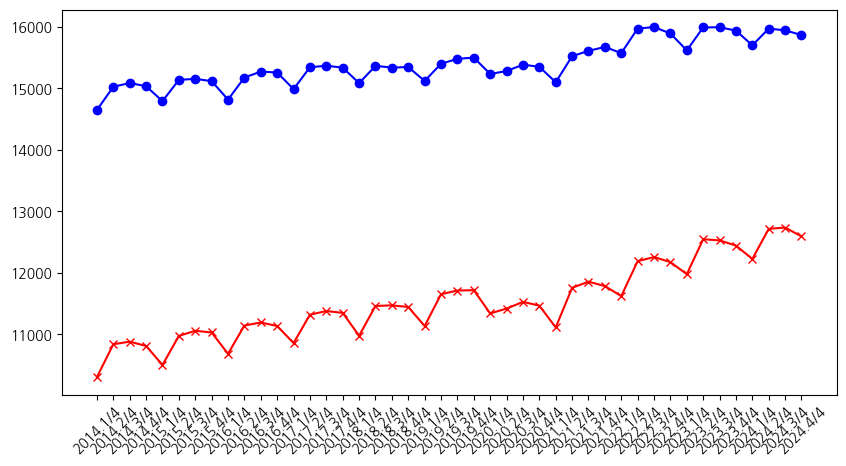

In [42]:
plt.figure(figsize=(10,5))
plt.plot(male['year'],male['total'], label='남자', color='blue',linestyle='-', marker='o')
plt.plot(female['year'],female['total'], label='여자', color='red',linestyle='-', marker='x')
plt.xticks(range(len(ex1_data)))
plt.xticks(ex1_data['year'],rotation=45)
plt.show()

In [52]:
ex3_data = ori.copy()
ex3_data.columns = ['resion', 'year', 'age', 'gender', 'value']
ex3_data.loc[ex_data['resion']=='세종특별자치시','value']=ex_data.loc[ex_data['resion']=='세종특별자치시']['value'].replace('-',0)
ex3_data

,resion,year,age,gender,value
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773
...,...,...,...,...,...
7435,제주도,2024.4/4,40 - 49세,여자,44
7436,제주도,2024.4/4,50 - 59세,남자,54
7437,제주도,2024.4/4,50 - 59세,여자,47
7438,제주도,2024.4/4,60세이상,남자,49


In [53]:
ex3_data['value']=ex3_data['value'].astype(int)  
Age = ex3_data.groupby(['year','age'])['value'].sum().reset_index(name='total')
Age

,year,age,total
0,2014.1/4,20 - 29세,3507
1,2014.1/4,30 - 39세,5773
2,2014.1/4,40 - 49세,6839
3,2014.1/4,50 - 59세,5793
4,2014.1/4,60세이상,3043
...,...,...,...
215,2024.4/4,20 - 29세,3532
216,2024.4/4,30 - 39세,5500
217,2024.4/4,40 - 49세,6162
218,2024.4/4,50 - 59세,6706


In [54]:
age2=Age['age']=='20 - 29세'
age3=Age['age']=='30 - 39세'
age4=Age['age']=='40 - 49세'
age5=Age['age']=='50 - 59세'
age6=Age['age']=='60세이상'

Age2=Age[age2]
Age3=Age[age3]
Age4=Age[age4]
Age5=Age[age5]
Age6=Age[age6]

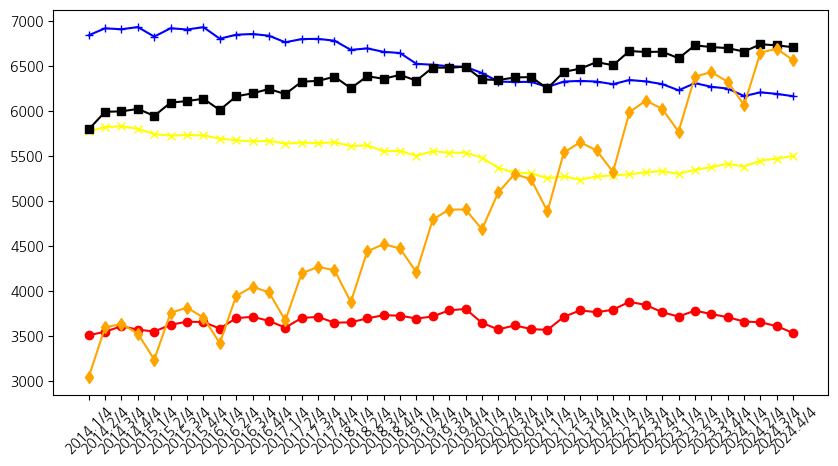

In [73]:
Age = Age.sort_values(by='year')  # 먼저 정렬
plt.figure(figsize=(10,5))
plt.plot(Age2['year'], Age2['total'], label='20 - 29세', color='red', linestyle='-', marker='o')
plt.plot(Age3['year'], Age3['total'], label='30 - 39세', color='yellow', linestyle='-', marker='x')
plt.plot(Age4['year'], Age4['total'], label='40 - 49세', color='blue', linestyle='-', marker='+')
plt.plot(Age5['year'], Age5['total'], label='50 - 59세', color='black', linestyle='-', marker='s')
plt.plot(Age6['year'], Age6['total'], label='60세이상', color='orange', linestyle='-', marker='d')
plt.xticks(range(len(ex1_data)))
plt.xticks(ex1_data['year'],rotation=45)
plt.show()